#Topic Modeling Tweets

Using tweets with the hashtag #micropoetry to better understand the popularity of poetic topics in the post internet age

import stuff

In [60]:
%matplotlib inline
import os
import glob
import numpy as np
import sklearn.feature_extraction.text as text
from sklearn import decomposition
import matplotlib.pyplot as plt
import operator
import pandas as pd
import re
import operator

put tweets in a list

In [61]:
filenames = sorted(glob.glob('twitter/Individual Tweets/*'))

We're only using the first thousand tweets

In [62]:
print(len(filenames))

7668


check the first 5 tweets

In [63]:
print(filenames[:5])

['twitter/Individual Tweets/00001.txt', 'twitter/Individual Tweets/00002.txt', 'twitter/Individual Tweets/00003.txt', 'twitter/Individual Tweets/00004.txt', 'twitter/Individual Tweets/00005.txt']


Convert the collection of text documents to a matrix of token counts:

http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [64]:
vectorizer = text.CountVectorizer(input='filename', stop_words='english', min_df=20)

documentation on fit_transform and get_feature_names:

http://scikit-learn.org/stable/modules/feature_extraction.html

In [65]:
dtm = vectorizer.fit_transform(filenames).toarray()

In [66]:
vocab = np.array(vectorizer.get_feature_names())

In [67]:
print(dtm.shape)

(7668, 492)


In [68]:
print(len(vocab))

492


Set how many topics we want

In [69]:
num_topics = 10

Set how many words we want in each topic

In [70]:
num_top_words = 20

Non-Negative Matrix Factorization (NMF)

Find two non-negative matrices (W, H) whose product approximates the non- negative matrix X.

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html

In [71]:
clf = decomposition.NMF(n_components=num_topics, random_state=1)

In [72]:
doctopic = clf.fit_transform(dtm)

In [73]:
topic_words = []

In [74]:
for topic in clf.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    topic_words.append([vocab[i] for i in word_idx])

In [75]:
doctopic = doctopic / np.sum(doctopic, axis=1, keepdims=True)

make an empty list

In [76]:
novel_names = []

fill the list with file names 0-1000

In [77]:
for fn in filenames:
    basename = os.path.basename(fn)
    name, ext = os.path.splitext(basename)
    novel_names.append(name)

make the list an array

In [78]:
novel_names = np.asarray(novel_names)

In [79]:
doctopic_orig = doctopic.copy()

In [80]:
num_groups = len(set(novel_names))

In [81]:
doctopic_grouped = np.zeros((num_groups, num_topics))

In [82]:
for i, name in enumerate(sorted(set(novel_names))):
    doctopic_grouped[i, :] = np.mean(doctopic[novel_names == name, :], axis=0)

In [83]:
doctopic = doctopic_grouped

In [84]:
novels = sorted(set(novel_names))

In [85]:
d = {}
for i in range(len(doctopic)):
    top_topics = np.argsort(doctopic[i,:])[::-1][0:1]
    top_topics_str = ' '.join(str(t) for t in top_topics)
    d[novels[i]] = top_topics_str
    #print("{}: {}".format(novels[i], top_topics_str))
s = sorted(d.items(), key=operator.itemgetter(0))

open up a comma-separated values sheet

In [86]:
micro_poems_csv = pd.read_csv('micro_poetry.csv', header=True, encoding='latin1')

In [87]:
len(micro_poems_csv)

21632

make a dictionary out of it

In [88]:
micro_poems_dict = micro_poems_csv.to_dict()

make a list of tweets

In [89]:
l = [value for key, value in micro_poems_dict["Tweet Text"].items()]

clean up the tweets

In [90]:
l2 = []
for tweet in l:
    tweet = tweet.replace("RT", "")
    tweet = ' '.join(re.sub("(\#[A-Za-z0-9_]+)|(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet).split())
    tweet = ' '.join(re.sub("( tco[A-Za-z0-9]+)", "", tweet).split())
    tweet = tweet.replace("https", "")
    tweet = tweet.replace("http", "")
    tweet = tweet.lower()
    l2.append(tweet)

make a dictionary containing the tweets as keys and the number of occurrences as values

In [91]:
d = {}
for tweet in l2:
    if tweet not in d:
        d[tweet] = 1
    else:
        d[tweet] += 1

make a list of file names

In [92]:
l3 = [tup[0] for tup in s]

make a list of favorites tweet

In [93]:
l4 = [value for key, value in micro_poems_dict["Favorites"].items()]

make a list of top topics per tweet

In [94]:
l5 = []
for tup in s:
    l5.append(tup[1])

make a list of tuples, containing the top topic in a tweet and the number of favorites in that tweet

In [107]:
l6 = [value for key, value in micro_poems_dict["Retweets"].items()]

In [108]:
s2 = list(zip(l5, l4))

In [109]:
s3 = list(zip(l5, l6))

plot the favorites per topic

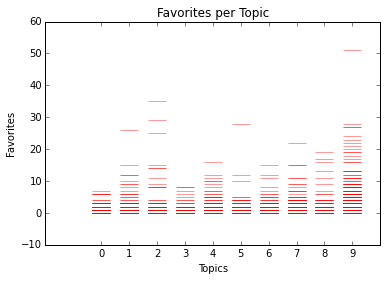

In [110]:
plt.scatter(*zip(*s2), color='r', s=300, marker='_', alpha=.4)
plt.xticks(np.arange(10))
#plt.yticks(np.arange(0, 1000))
plt.title('Favorites per Topic')
plt.xlabel('Topics')
plt.ylabel('Favorites')
plt.show()

plot the retweets per topic

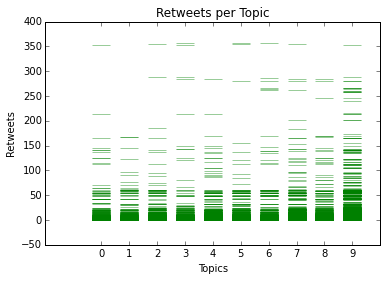

In [111]:
plt.scatter(*zip(*s3), color='g', s=300, marker='_', alpha=.4)
plt.xticks(np.arange(10))
#plt.yticks(np.arange(0, 1000))
plt.title('Retweets per Topic')
plt.xlabel('Topics')
plt.ylabel('Retweets')
plt.show()

Show the content of the topics

In [97]:
for t in range(len(topic_words)):
    print("Topic {}: {}".format(t, ' '.join(topic_words[t][:15])))

Topic 0: love true lost fall want touch old live lust feel lips poetry god matter theres
Topic 1: like feel god kiss words days wind warm wild thats look away sky honey soul
Topic 2: heart soul mind let words apart loves inside amp broken head song smile skin home
Topic 3: im youre going write afraid lost fast think good say quick home look verse need
Topic 4: life say things sit death reflect way old think right does man living hope change
Topic 5: just write verse bit little way wait ill light think away thats let want fast
Topic 6: time come way away day mind little place tea gone hearts rain let maybe distant
Topic 7: eyes words soul lips dreams smile world kiss look closed sleep tears away lost hold
Topic 8: know dont want need feel say youre going write let verse mind fast things happens
Topic 9: night day sky moon light sun winter rain morning wind cold stars clouds black leaves
